Assignment 3: Universal Function Approximator
=============================================


Microsoft Forms Document: https://forms.office.com/r/dcZ3NADdya

A two-layer network is defined by three steps:

1. Compute the first layer, i.e., $\vec a = \mathbf W^{(1)} \vec x$.
2. Apply the activation function element-wise: $\vec h = g(\vec a)$
3. Compute the network output: $y = \vec w^{(2)}\,^T\vec h$.

Task 1: Network Implementation
------------------------------

Implement a function that returns the network output for a given input $\vec x$ and parameters $\Theta=(\mathbf W^{(1)}, \vec w^{(2)})$. Remember that the input of the function $\vec x = (1, x)^T$. Also remember to prepend $h_0=1$ in your implementation.

<img src="two_layer_network.png" width="50%">

In [1]:
import numpy as np
import math

np.random.seed(1)
# 如果不按 filled 的版本，为何会出现 exp runtime error？？？

#注意 h 是一个 vector
def network(x, Theta):
    W1, w2 = Theta
    a = np.dot(W1,x)
    # h = np.hstack(([1], 1 / (1+np.exp(-a))))
    h = np.concatenate(([1], 1/(1 + np.exp(-a))))
    y = np.dot(w2.T,h)
    return y, h

# np.insert(arr, obj, values, axis=None)

# def network(x, Theta):
#     W1, w2 = Theta
#     a = W1.dot(x) 
#     h = 1/(1+np.exp(-a)) 
#     h = np.insert(h, 0, 1, axis=0) 
#     y = w2.dot(h) 
#     return y, h

Test 1: Zero and One Weights
----------------------------

We select a specific number of hidden neurons and create the weights accordingly, using all zeros in the first layer and all ones in the second. What is the expected network output of this, for any $\vec x$?

In [2]:


K = 10
x = np.random.uniform(-10, 10, np.random.randint(5,20))
# 注意这里只是 vector 这里 D 意味着 x的future 个数 ， 也就是 第一层输入的个数 D
# 而 K 代表后一层的神经元个数（不加bias）
D = len(x)

W1_zeros = np.zeros(shape=(K,D))
w2_ones = np.ones(shape=(K+1,))

# 注意！！！ h 是要自己加一个 1 的，而不是加一个 0.5
expected_h = np.append(1, np.ones(shape=(K,1))*0.5)
expected_y = np.array(0.5*(K)+1)

actual_y, actual_h = network(x, (W1_zeros,w2_ones))

# test network output
print("actual_y:",actual_y)
print("actual_h:",actual_h)

assert expected_y == actual_y
assert all(expected_h == actual_h)

actual_y: 6.0
actual_h: [1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


Task 2: Gradient Implementation
-------------------------------
We need to compute the gradient for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, which is composed of two parts, one for $\mathbf W^{(1)}$ and one for $\vec w^{(2)}$.

<img src="w2_gradient.png" width="50%"><img src="W1_gradient.png" width="50%">

In [3]:
def gradient(X, Theta):
    # split parameters for easier handling
    W1, w2 = Theta
  
    # define gradient with respect to both parameters
    dw2 = np.zeros(w2.shape)
    dW1 = np.zeros(W1.shape)

    # iterate over dataset
    for x, t in X:
        y, h = network(x, Theta)
        dw2 += (y-t)*h
        # 为什么 filled 的代码里面不考虑 bias，用 w2[1:] 和 h2[1:] ? 公式里难道不是写的 (K + 1) 吗？
        # 公式写错了，如果 W1.shape = K x (D+1) 的话，就不应该考虑 K + 1
        dW1 += np.outer( (y-t) * w2[1:] * h[1:] * (1-h[1:]), x )
        
    # anything else?
    dw2 *= 2/len(X)
    dW1 *= 2/len(X)
  
    return dW1, dw2

Task 3: Gradient Descent
------------------------

Gradient descent is implemented as the repeated application of two steps:

1. Compute the gradient of loss via the gradient function implemented in Task 2.
2. Update the parameters according to a given learning rate $\eta$.

Implement a function that performs gradient descent for a given dataset, given initial parameters and a given learning rate $\eta$.

In [4]:
# 不一样的地方
# dTheta => W1,w2
# return W1,w2 or Theta 有错
# -= or W1 = W1 - eta * dTheta[0] √
def gradient_descent(X, Theta, eta):
    epochs = 10000
    W1,w2 = Theta
    
    # perform iterative gradient descent
    for epoch in range(epochs):
        # compute the gradient
        dTheta = gradient(X, Theta)

        # update the parameters
        W1 -= eta * dTheta[0]
        w2 -= eta * dTheta[1]

    # return optimized parameters
    return W1,w2

# def gradient_descent(X, Theta, eta):
#   epochs = 10000
#   W1, w2 = Theta
#   # perform iterative gradient descent
#   for epoch in range(epochs):
#     # compute the gradient 
#     dTheta = gradient(X, Theta) 
#     # update the parameters 
#     W1 -= eta * dTheta[0] 
#     w2 -= eta * dTheta[1] 
    
#   # return optimized parameters 
#   return Theta

Task 4: Datasets
----------------

Create datasets $X_1$, $X_2$ and $X_3$ according to the functions and ranges defined in the assignment. Remember that $\vec x = (1,x)^T$, and the structure of the dataset is a list of tuples: $\{(\vec x^{[n]}, t^{[n]})\}$.

<img src="task4.png" width="80%">

In [5]:
X1 = [ (np.array([1,x]), np.cos(3*x) ) for x in np.random.uniform(-2,2,50)  ]
X2 = [ (np.array([1,x]), np.exp(-x**2) ) for x in np.random.uniform(-2,2,30) ]
X3 = [ (np.array([1,x]), x**5 + 3*x**4 - 11*x**3 - 27*x**2 + 10*x + 64 ) for x in np.random.uniform(-4.5,3.5,200) ]
# X1 = np.array([((np.array((1, x)),np.cos(3*x))) for x in np.random.uniform(-2,2,50)], dtype=object) 
# X2 = np.array([((np.array((1, x)),np.exp(-(x**2)))) for x in np.random.uniform(-2,2,30)], dtype=object) 
# X3 = np.array([(np.array((1, x)),x**5 + 3*x**4 - 11*x**3 - 27*x**2 + 10*x + 64) for x in np.random.uniform(-4.5,3.5,200)], dtype=object)
print(X1[0])

(array([ 1.        , -0.74690593]), -0.6209244316203576)


Task 5: Define Number of Hidden Neurons
---------------------------------------

How many hidden neurons will we need to approximate the three different functions?

In [6]:
# hidden neurons 是一个超参数，需要自己调
K1 = 6
K2 = 25
K3 = 100

Task 6: Random Parameters
-------------------------
Initialize three different sets of parameters for the given number of samples taken from Task 5.

In [7]:
Theta1 = ( np.random.uniform(-1,1,(K1,2)), np.random.uniform(-1,1,K1+1) )
Theta2 = ( np.random.uniform(-1,1,(K2,2)), np.random.uniform(-1,1,K2+1) )
Theta3 = ( np.random.uniform(-1,1,(K3,2)), np.random.uniform(-1,1,K3+1) )

Task 7: Gradient Descent
------------------------

Call gradient descent for each dataset with their according parameters.

WARNING! Depending on the implementation, this might run for several minutes!

In [8]:
optimial_Theta1 = gradient_descent(X1, Theta1, 0.1)
print(optimial_Theta1[0])
print(optimial_Theta1[1])

[[-3.10819889 -4.83152659]
 [-2.10860687  1.51935377]
 [-0.16797778  0.65612313]
 [ 3.37728968 -2.19951207]
 [-4.06039653 -2.65251126]
 [ 2.80010309 -4.63652721]]
[-0.22993605 -3.24184038  2.3357943   0.8067551  -3.57436341  4.72231472
  4.3069793 ]


In [9]:
optimial_Theta2 = gradient_descent(X2, Theta2, 0.1)

In [10]:
optimial_Theta3 = gradient_descent(X3, Theta3, 0.01)

Task 8: Plotting Function
-------------------------

Implement a function that plots the output of the network as a line, as well as the training data.

In [11]:
from matplotlib import pyplot
def plot(X, Theta, R):
    # first, plot data samples
    X_futures = [ x[0][1] for x in X]
    t = [ x[1] for x in X]
    pyplot.plot(X_futures, t, "rx", label="Data")

    # define equidistant points from R[0] to R[1] to evaluate the network
    x = np.linspace(R[0],R[1],num=100)
    # compute the network outputs for these values
    y = [network([1,i],Theta)[0] for i in x]
    # plot network approximation
    pyplot.plot(x, y, "k-", label="network")
    pyplot.legend()

Task 9: Plot Three Functions with their Data
--------------------------------------------

Call the function from Task 8 with three different datasets and their optimized parameters.

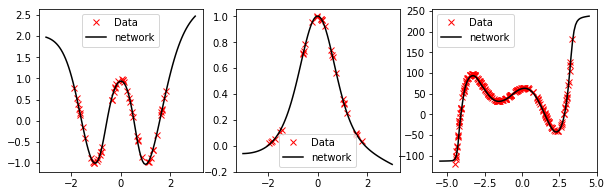

In [12]:

figure = pyplot.figure(figsize=(10,3))

# plot first function
pyplot.subplot(131)
plot(X1, Theta1, (-3,3))

# plot second function
pyplot.subplot(132)
plot(X2, Theta2, (-3,3))

# plot third function
pyplot.subplot(133)
plot(X3, Theta3, (-5.5,4.5))